In [6]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

In [2]:
userdata=pd.read_csv('cdata.csv')

In [3]:
userdata

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
userdata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
userdata.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
userdata.shape

(301, 9)

In [9]:
userdata.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
print(userdata.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [15]:
print(userdata.Selling_type.value_counts())

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le= LabelEncoder()

In [30]:
userdata['Selling_type']=le.fit_transform(userdata['Selling_type'])
userdata['Transmission']=le.fit_transform(userdata['Transmission'])
userdata['Fuel_Type']=le.fit_transform(userdata['Fuel_Type'])

In [31]:
userdata

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()

In [38]:
x=userdata.drop(['Selling_Price','Car_Name'],axis=1)

In [39]:
y=userdata['Selling_Price']

In [40]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [41]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [55]:
lg.fit(x_train,y_train)

Lasso()

In [56]:
print("Accuracy: ",lg.score(x_test,y_test)*100)

Accuracy:  82.28214318901573


In [57]:
prediction=lg.predict(x_train)

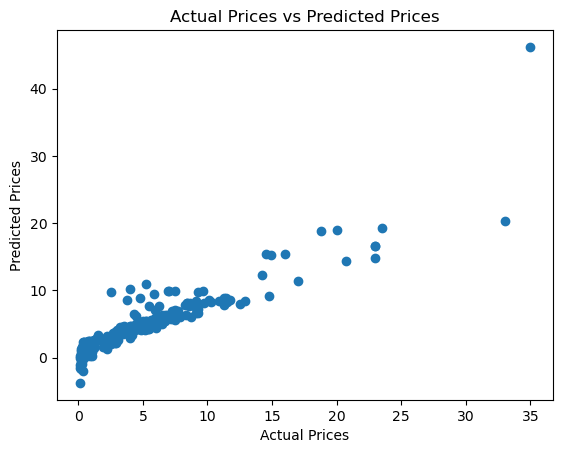

In [58]:
mp.scatter(y_train,prediction)
mp.xlabel("Actual Prices")
mp.ylabel("Predicted Prices")
mp.title("Actual Prices vs Predicted Prices")
mp.show()

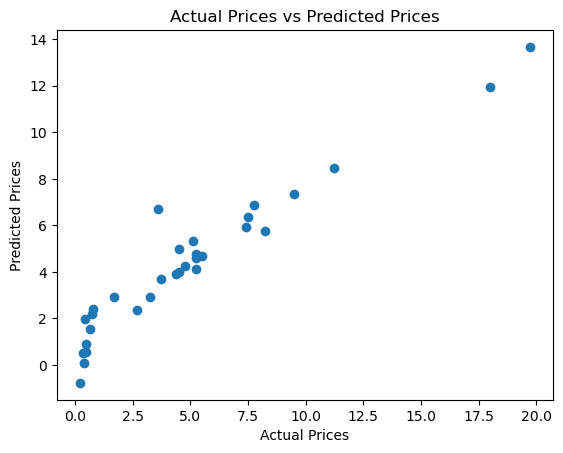

In [64]:
from sklearn.linear_model import Lasso
lg=Lasso()

x=userdata.drop(['Selling_Price','Car_Name'],axis=1)

y=userdata['Selling_Price']

x

y

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

lg.fit(x_train,y_train)



prediction=lg.predict(x_test)

mp.scatter(y_test,prediction)
mp.xlabel("Actual Prices")
mp.ylabel("Predicted Prices")
mp.title("Actual Prices vs Predicted Prices")
mp.show()

In [65]:
print("Accuracy: ",lg.score(x_test,y_test)*100)


Accuracy:  82.28214318901573
